# Missão: Analisar o Sistema de Pedidos por Regiões, Itens e Vendedores 



Você recebeu a tarefa de analisar os dados de Preço de Unidades e Unidades da empresa DSA! O arquivo esta no 
formato em excel para a realização da tarefa.

No sistema, cada vendedor efetuou nas regiões registradas o preço de unidades por itens e regiões, onde também foi realizada a unidades de vendas por esses Itens e regiões. 

Seu trabalho é entregar uma ánalise comportamental de vendas em cada região e itens. Apresentar uma ánalise geral da quantidade de vendas desses vendedores por Unidades e avaliar o preço ofertado por eles nos lugares indicados. 

O Relatório deve incluir cada um dos seguintes registros: 

** Regiões por Preço **

* Total de Preços
* Média de Preços
* Máximo de Preços 
* Mínimo de Preços
* Contagem de Preços
* Mediana de Preços
* Desvio Padrão 
* Variância de Preços 

** Regiões por Unidades **

* Total de Unidades 
* Media de Unidades
* Máximo de Unidades 
* Mínimo de Unidades
* Mediana de Unidades
* Desvio Padrão de Unidades 
* Contagem 
* Indice de Regiões  

** Estados por PrecoUnidade ** 

* Total de Preços 
* Media de Preços 
* Máximo de Preços 
* Mínimo de Unidades 
* Mediana 
* Desvio Padrão 
* Contagem
* Variância

** Estados por Unidade ** 

* Total de Unidades 
* Media de Unidades
* Máximo de Unidades 
* Mínimo de Unidades
* Mediana de Unidades
* Desvio Padrão de Unidades 
* Contagem 
* Indice de Estados  

** Itens por Preço de Unidade **

* Total de Preços 
* Media de Preços 
* Máximo de Preços 
* Mínimo de Unidades 
* Mediana 
* Desvio Padrão 
* Variância
* Contagem 

** Itens por Unidade **

* Total de Unidades 
* Media de Unidades
* Máximo de Unidades 
* Mínimo de Unidades
* Mediana de Unidades
* Desvio Padrão de Unidades 
* Indice 

** Vendedores por Preço de Unidade **

* Total de Preços 
* Media de Preços 
* Máximo de Preços 
* Mínimo de Unidades 
* Mediana 
* Desvio Padrão 
* Variância
* Contagem 

** Unidades por Região e Itens  ** 

* Total de Unidades 
* Média de Unidades 

** Unidades por Estado e Itens ** 

* Total de Unidades 
* Média de Unidades 

** Unidades por Vendedores e Itens **

* Total de Unidades 
* Média de Unidades

** Preço de Unidades por Região e Itens ** 

* Preço Total de Unidades 
* Média de Preços de Unidades

** Preço de Unidades por Estado e Itens ** 

* Preço Total de Unidades 
* Média de Preços de Unidades 

** Preço de Unidades por Vendedor, Estado, Região e Itens ** 

* Preço Total de Unidades 
* Média de Preços de Unidades 


In [320]:
import os 
import subprocess
import stat
import numpy as np 
import pandas as pd 
import statistics
import seaborn as sns 
import matplotlib as mat 
import matplotlib.pyplot as plt 

from datetime import datetime 
sns.set(style="dark") 
%matplotlib inline

## Lendo a Planilhia de dados dos Sistemas de Pedidos 

In [245]:
pedidos = pd.read_excel("dados_pedidos.xlsx") 

analise = pd.DataFrame(pedidos)

analise

,DataPedido,Regiao,Estado,Vendedor,Item,Unidades,PrecoUnidade
0,7-Jun-2020,Nordeste,Pernambuco,Tobias,Geladeira,62,400.99
1,11-Jul-2020,Nordeste,Paraíba,Nadia,Microondas,29,100.99
2,20-Jul-2020,Sudeste,Minas Gerais,Carlos,Geladeira,55,1200.49
3,19-Jul-2020,Nordeste,Bahia,Tania,Microondas,81,1900.99
4,16-Aug-2020,Sudeste,Rio de Janeiro,Pedro,Geladeira,42,2300.95
5,22-Aug-2020,Nordeste,Alagoas,Tobias,Fogao,35,400.99
6,24-Aug-2020,Sul,Santa Catarina,Mauricio,Lavadora,3,2750.00
7,10-Sep-2020,Sudeste,Minas Gerais,Smith,Lavadora,2,1250.00
8,10-Sep-2020,Sudeste,Rio de Janeiro,Alan,Fogao,7,1000.29
9,12-Sep-2020,Nordeste,Pernambuco,Tobias,Geladeira,16,1500.99


## Análise Geral de Regiões por Preço de Unidade

In [246]:
## Cálculos Basicos 

total_regioes = analise.groupby(["Regiao"]).sum()["PrecoUnidade"].rename("Total de Preços")
media_regioes = analise.groupby(["Regiao"]).mean()["PrecoUnidade"].rename("Média de Preços")
maximo_regioes = analise.groupby(["Regiao"]).max()["PrecoUnidade"].rename("Máximo de Preços")
minimo_regioes = analise.groupby(["Regiao"]).min()["PrecoUnidade"].rename("Mínimo de Preços")
contagem_regioes = analise.groupby(["Regiao"]).count()["PrecoUnidade"].rename("Contagem de Preços")
mediana_regioes = analise.groupby(["Regiao"]).median()["PrecoUnidade"].rename("Mediana de Preços")
desvio_regioes = analise.groupby(["Regiao"]).std()["PrecoUnidade"].rename("Desvio Padrão")
variancia_regioes = analise.groupby(["Regiao"]).var()["PrecoUnidade"].rename("Variância de Preço") 

# # Resultados
analise_geral = pd.DataFrame({"Total de Preços": total_regioes,
                              "Média de Preços": media_regioes, 
                              "Máximo de Preços" : maximo_regioes, 
                              "Mínimo de Preços" : minimo_regioes, 
                              "Contagem de Preços" : contagem_regioes,
                              "Mediana de Preços" : mediana_regioes, 
                              "Desvio Padrão" : desvio_regioes, 
                              "Variância de Preço" : variancia_regioes})    

# Conversão de dados
analise_geral ["Total de Preços"] = analise_geral["Total de Preços"].map("R$ {:,.2f}".format)
analise_geral ["Média de Preços"] = analise_geral["Média de Preços"].map("R$ {:,.2f}".format)
analise_geral ["Máximo de Preços"] = analise_geral["Máximo de Preços"].map("R$ {:,.2f}".format)
analise_geral ["Mínimo de Preços"] = analise_geral["Mínimo de Preços"].map("R$ {:.2f}".format)
analise_geral ["Mediana de Preços"] = analise_geral["Mediana de Preços"].map("R$ {:,.2f}".format)
analise_geral ["Desvio Padrão"] = analise_geral["Desvio Padrão"].map("R$ {:,.2f}".format)
analise_geral ["Variância de Preço"] = analise_geral["Variância de Preço"].map("R$ {:,.2f}".format)

analise_geral

,Total de Preços,Média de Preços,Máximo de Preços,Mínimo de Preços,Contagem de Preços,Mediana de Preços,Desvio Padrão,Variância de Preço
Regiao,,,,,,,,
Nordeste,"R$ 14,882.87","R$ 1,144.84","R$ 2,400.99",R$ 100.99,13,"R$ 1,350.99",R$ 711.80,"R$ 506,658.97"
Sudeste,"R$ 33,991.45","R$ 1,416.31","R$ 2,400.99",R$ 400.99,24,"R$ 1,411.99",R$ 534.47,"R$ 285,656.43"
Sul,"R$ 12,044.95","R$ 2,007.49","R$ 2,750.00",R$ 1450.99,6,"R$ 1,900.99",R$ 466.66,"R$ 217,772.47"


## Análise Geral de Regiões por Unidade

In [247]:
## Cálculos Basicos 

total_regioes_unidade = analise.groupby(["Regiao"]).sum()["Unidades"].rename("Total de Unidades")
media_regioes_unidade = analise.groupby(["Regiao"]).mean()["Unidades"].rename("Média de Unidades") 
maximo_regioes_unidade = analise.groupby(["Regiao"]).max()["Unidades"].rename("Máximo de Unidades")
minimo_regioes_unidade = analise.groupby(["Regiao"]).min()["Unidades"].rename("Mínimo de Unidades")
mediana_regioes_unidade = analise.groupby(["Regiao"]).median()["Unidades"].rename("Mediana de Unidades")
desvio_regioes_unidade = analise.groupby(["Regiao"]).std()["Unidades"].rename("Desvio Padrão de Unidades")
contagem_regioes_unidade = analise.groupby(["Regiao"]).count()["Unidades"].rename("Contagem")
variancia_regioes_unidade = analise.groupby(["Regiao"]).var()["Unidades"].rename("Variância de Unidades") 
indice_regiao = (total_regioes_unidade / total_regioes) * 100

## Resultados
analise_geral = pd.DataFrame({"Total de Unidades" : total_regioes_unidade,
                              "Média de Unidades" : media_regioes_unidade,
                              "Máximo de Unidades" : maximo_regioes_unidade, 
                              "Mínimo de Unidades" : minimo_regioes_unidade,
                              "Mediana de Unidades" : mediana_regioes_unidade,
                              "Desvio Padrão de Unidades" : desvio_regioes_unidade,
                              "Variância de Unidades" : variancia_regioes_unidade,
                              "Contagem" : contagem_regioes_unidade,
                              "%" : indice_regiao}) 

# Conversão de dados
analise_geral ["Média de Unidades"] = analise_geral["Média de Unidades"].map("{:,.2f}".format)
analise_geral ["Desvio Padrão de Unidades"] = analise_geral["Desvio Padrão de Unidades"].map("{:,.2f}".format)
analise_geral ["Variância de Unidades"] = analise_geral["Variância de Unidades"].map("{:,.2f}".format)
analise_geral ["%"] = analise_geral["%"].map("{:,.1f}%".format) 

analise_geral

,Total de Unidades,Média de Unidades,Máximo de Unidades,Mínimo de Unidades,Mediana de Unidades,Desvio Padrão de Unidades,Variância de Unidades,Contagem,%
Regiao,,,,,,,,,
Nordeste,691,53.15,96,4,60,30.62,937.64,13,4.6%
Sudeste,1199,49.96,96,2,50,30.57,934.48,24,3.5%
Sul,231,38.50,76,3,44,29.49,869.90,6,1.9%


## Análise Geral de Estados por Preço Unidade

In [248]:
## Cálculos Basicos 
total_estados_preco = analise.groupby(["Estado"]).sum()["PrecoUnidade"].rename("Total de Preços")
media_estados_preco = analise.groupby(["Estado"]).mean()["PrecoUnidade"].rename("Média de Preços") 
maximo_estados_preco = analise.groupby(["Estado"]).max()["PrecoUnidade"].rename("Máximo de Preços")
minimo_estados_preco = analise.groupby(["Estado"]).min()["PrecoUnidade"].rename("Mínimo de Preços") 
mediana_estados_preco = analise.groupby(["Estado"]).median()["PrecoUnidade"].rename("Médiana de Preços") 
desvio_estados_preco = analise.groupby(["Estado"]).std()["PrecoUnidade"].rename("Desvio Padrão")
variancia_estados_preco = analise.groupby(["Estado"]).var()["PrecoUnidade"].rename("Variância de Preços")


# Resultados
analise_geral = pd.DataFrame({"Total de Preços" : total_estados_preco, 
                              "Média de Preços" : media_estados_preco,
                              "Máximo de Preços" : maximo_estados_preco, 
                              "Mínimo de Preços" : minimo_estados_preco, 
                              "Médiana de Preços" : mediana_estados_preco, 
                              "Desvio Padrão" : desvio_estados_preco, 
                              "Variância de Preços" : variancia_estados_preco}) 

analise_geral ["Total de Preços"] = analise_geral["Total de Preços"].map("R$ {:,.2f}".format)
analise_geral ["Média de Preços"] = analise_geral["Média de Preços"].map("R$ {:,.2f}".format) 
analise_geral ["Máximo de Preços"] = analise_geral["Máximo de Preços"].map("R$ {:,.2f}".format) 
analise_geral ["Mínimo de Preços"] = analise_geral["Mínimo de Preços"].map("R$ {:,.2f}".format)
analise_geral ["Médiana de Preços"] = analise_geral["Médiana de Preços"].map("R$ {:,.2f}".format)
analise_geral ["Desvio Padrão"] = analise_geral["Desvio Padrão"].map("R$ {:,.2f}".format) 
analise_geral ["Variância de Preços"] = analise_geral["Variância de Preços"].map("R$ {:,.2f}".format)

analise_geral

,Total de Preços,Média de Preços,Máximo de Preços,Mínimo de Preços,Médiana de Preços,Desvio Padrão,Variância de Preços
Estado,,,,,,,
Alagoas,R$ 400.99,R$ 400.99,R$ 400.99,R$ 400.99,R$ 400.99,R$ nan,R$ nan
Bahia,"R$ 4,202.97","R$ 1,400.99","R$ 1,900.99",R$ 400.99,"R$ 1,900.99",R$ 866.03,"R$ 750,000.00"
Ceará,"R$ 2,771.98","R$ 1,385.99","R$ 1,420.99","R$ 1,350.99","R$ 1,385.99",R$ 49.50,"R$ 2,450.00"
Minas Gerais,"R$ 4,792.47","R$ 1,198.12","R$ 1,450.99",R$ 890.99,"R$ 1,225.24",R$ 231.64,"R$ 53,656.41"
Paraná,"R$ 1,900.99","R$ 1,900.99","R$ 1,900.99","R$ 1,900.99","R$ 1,900.99",R$ nan,R$ nan
Paraíba,R$ 100.99,R$ 100.99,R$ 100.99,R$ 100.99,R$ 100.99,R$ nan,R$ nan
Pernambuco,"R$ 3,402.97","R$ 1,134.32","R$ 1,500.99",R$ 400.99,"R$ 1,500.99",R$ 635.09,"R$ 403,333.33"
Pernanbumco,"R$ 2,400.99","R$ 2,400.99","R$ 2,400.99","R$ 2,400.99","R$ 2,400.99",R$ nan,R$ nan
Rio Grande do Norte,R$ 800.99,R$ 800.99,R$ 800.99,R$ 800.99,R$ 800.99,R$ nan,R$ nan


## Análise Geral de Estados por Unidade

In [249]:
total_estados_unidades = analise.groupby(["Estado"]).sum()["Unidades"].rename("Total de Unidades") 
media_estados_unidades = analise.groupby(["Estado"]).mean()["Unidades"].rename("Media de Unidades")
maximo_estados_unidades = analise.groupby(["Estado"]).max()["Unidades"].rename("Máximo de Unidades") 
minimo_estados_unidades = analise.groupby(["Estado"]).min()["Unidades"].rename("Mínimo de Unidades")
mediana_estados_unidades = analise.groupby(["Estado"]).median()["Unidades"].rename("Mediana de Unidades")
indice_estados = (total_estados_unidades / total_estados_preco) * 100

analise_geral = pd.DataFrame({"Total de Unidades" : total_estados_unidades, 
                              "Media de Unidades" : media_estados_unidades, 
                              "Máximo de Unidades" : maximo_estados_unidades, 
                              "Mínimo de Unidades" : minimo_estados_unidades, 
                              "Mediana de Unidades" : mediana_estados_unidades,
                              "%" : indice_estados}) 

analise_geral ["Media de Unidades"] = analise_geral["Media de Unidades"].map("{:,.2f}".format)
analise_geral ["%"] = analise_geral["%"].map("{:,.1f}%".format) 
analise_geral


,Total de Unidades,Media de Unidades,Máximo de Unidades,Mínimo de Unidades,Mediana de Unidades,%
Estado,,,,,,
Alagoas,35,35.00,35,35,35.0,8.7%
Bahia,192,64.00,96,15,81.0,4.6%
Ceará,99,49.50,95,4,49.5,3.6%
Minas Gerais,181,45.25,96,2,41.5,3.8%
Paraná,7,7.00,7,7,7.0,0.4%
Paraíba,29,29.00,29,29,29.0,28.7%
Pernambuco,152,50.67,74,16,62.0,4.5%
Pernanbumco,60,60.00,60,60,60.0,2.5%
Rio Grande do Norte,60,60.00,60,60,60.0,7.5%


In [250]:
desvio_padrao_estados = analise.groupby(["Estado"]).std()["Unidades"].rename("Desvio Padrão") 
desvio_padrao_estados = desvio_padrao_estados.drop_duplicates() 
desvio_padrao_estados.head(5)

desvio_padrao_estados = pd.DataFrame({"Desvio Padrão" : desvio_padrao_estados}) 

desvio_padrao_estados ["Desvio Padrão"] = desvio_padrao_estados["Desvio Padrão"].map("{:,.2f}".format) 

desvio_padrao_estados

,Desvio Padrão
Estado,
Alagoas,nan
Bahia,43.09
Ceará,64.35
Minas Gerais,40.16
Pernambuco,30.62
Rio Grande do Sul,22.07
Rio de Janeiro,32.55
Santa Catarina,37.48
São Paulo,26.26


In [251]:
variancia_estados_unidades = analise.groupby(["Estado"]).var()["Unidades"].rename("Variância de Unidades") 
variancia_estados_unidades = variancia_estados_unidades.drop_duplicates()
variancia_estados_unidades.head(5)

variancia_estados_unidades = pd.DataFrame({"Variância de Unidades" : variancia_estados_unidades}) 

variancia_estados_unidades ["Variância de Unidades"] = variancia_estados_unidades["Variância de Unidades"].map("{:,.2f}".format)
variancia_estados_unidades

,Variância de Unidades
Estado,
Alagoas,nan
Bahia,"1,857.00"
Ceará,"4,140.50"
Minas Gerais,"1,612.92"
Pernambuco,937.33
Rio Grande do Sul,487.00
Rio de Janeiro,"1,059.62"
Santa Catarina,"1,404.50"
São Paulo,689.74


## Análise Geral de Itens por Preco de Unidade 

In [252]:
total_itens_preco = analise.groupby(["Item"]).sum()["PrecoUnidade"].rename("Total de Preços") 
media_itens_preco = analise.groupby(["Item"]).mean()["PrecoUnidade"].rename("Média de Preços")
maximo_itens_preco = analise.groupby(["Item"]).max()["PrecoUnidade"].rename("Máximo de Preços") 
minimo_itens_preco = analise.groupby(["Item"]).min()["PrecoUnidade"].rename("Mínimo de Preços") 
mediana_itens_preco = analise.groupby(["Item"]).median()["PrecoUnidade"].rename("Mediana de Preços") 
desvio_padrao = analise.groupby(["Item"]).std()["PrecoUnidade"].rename("Desvio Padrão") 
variancia_padrao = analise.groupby(["Item"]).var()["PrecoUnidade"].rename("Variância de Preços")
contagem_preco = analise.groupby(["Item"]).count()["PrecoUnidade"].rename("Contagem")

analise_geral = pd.DataFrame({"Total de Preços" : total_itens_preco, 
                              "Média de Preços" : media_itens_preco, 
                              "Máximo de Preços" : maximo_itens_preco, 
                              "Mínimo de Preços" : minimo_itens_preco, 
                              "Mediana de Preços" : mediana_itens_preco, 
                              "Desvio Padrão" : desvio_padrao, 
                              "Variância de Preços" : variancia_padrao, 
                              "Contagem" : contagem_preco}) 

analise_geral["Total de Preços"] = analise_geral["Total de Preços"].map("R$ {:,.2f}".format)  
analise_geral["Média de Preços"] = analise_geral["Média de Preços"].map("R$ {:,.2f}".format)
analise_geral["Máximo de Preços"] = analise_geral["Máximo de Preços"].map("R$ {:,.2f}".format)
analise_geral["Mínimo de Preços"] = analise_geral["Mínimo de Preços"].map("R$ {:,.2f}".format) 
analise_geral["Mediana de Preços"] = analise_geral["Mediana de Preços"].map("R$ {:,.2f}".format) 
analise_geral["Desvio Padrão"] = analise_geral["Desvio Padrão"].map("R$ {:,.2f}".format)
analise_geral["Variância de Preços"] = analise_geral["Variância de Preços"].map("R$ {:,.2f}".format)

analise_geral

,Total de Preços,Média de Preços,Máximo de Preços,Mínimo de Preços,Mediana de Preços,Desvio Padrão,Variância de Preços,Contagem
Item,,,,,,,,
Fogao,"R$ 23,856.02","R$ 1,325.33","R$ 2,340.99",R$ 400.99,"R$ 1,386.99",R$ 626.48,"R$ 392,475.72",18
Geladeira,"R$ 9,789.39","R$ 1,398.48","R$ 2,300.95",R$ 400.99,"R$ 1,450.99",R$ 558.82,"R$ 312,278.88",7
Lavadora,"R$ 5,250.00","R$ 1,750.00","R$ 2,750.00","R$ 1,250.00","R$ 1,250.00",R$ 866.03,"R$ 750,000.00",3
Microondas,"R$ 22,023.86","R$ 1,468.26","R$ 2,400.99",R$ 100.99,"R$ 1,500.00",R$ 666.68,"R$ 444,459.25",15


## Análise Geral de Itens por Unidade

In [253]:
total_itens = analise.groupby(["Item"]).sum()["Unidades"].rename("Total de Unidades") 
media_itens = analise.groupby(["Item"]).mean()["Unidades"].rename("Média de Unidades")
maximo_itens = analise.groupby(["Item"]).max()["Unidades"].rename("Máximo de Unidades") 
minimo_itens = analise.groupby(["Item"]).min()["Unidades"].rename("Mínimo de Unidades") 
mediana_itens = analise.groupby(["Item"]).median()["Unidades"].rename("Mediana de Unidades") 
desvio_itens = analise.groupby(["Item"]).std()["Unidades"].rename("Desvio Padrão") 
variancia_itens = analise.groupby(["Item"]).var()["Unidades"].rename("Variância de Unidades") 
indice_itens = (total_itens / total_itens_preco) * 100 

analise_geral = pd.DataFrame({"Total de Unidades" : total_itens, 
                              "Média de Unidades" : media_itens, 
                              "Máximo de Unidades" : maximo_itens, 
                              "Mínimo de Unidades" : minimo_itens, 
                              "Mediana de Unidades" : mediana_itens,
                              "Desvio Padrão" : desvio_itens, 
                              "Variância de Unidades" : variancia_itens, 
                              "%" : indice_itens}) 

analise_geral["Média de Unidades"] = analise_geral["Média de Unidades"].map("{:,.2f}".format) 
analise_geral["Desvio Padrão"] = analise_geral["Desvio Padrão"].map("{:,.2f}".format)
analise_geral["Variância de Unidades"] = analise_geral["Variância de Unidades"].map("{:,.2f}".format)
analise_geral["%"] = analise_geral["%"].map("{:,.1f}%".format)

analise_geral

,Total de Unidades,Média de Unidades,Máximo de Unidades,Mínimo de Unidades,Mediana de Unidades,Desvio Padrão,Variância de Unidades,%
Item,,,,,,,,
Fogao,994,55.22,96,7,60,29.29,857.71,4.2%
Geladeira,395,56.43,96,16,55,25.14,631.95,4.0%
Lavadora,10,3.33,5,2,3,1.53,2.33,0.2%
Microondas,722,48.13,94,4,50,29.61,876.70,3.3%


## Análise Geral de Vendedores por Preço de Unidade

In [254]:
preco_total_venda = analise.groupby(["Vendedor"]).sum()["PrecoUnidade"].rename("Preço total de Vendas ") 
preco_media_venda = analise.groupby(["Vendedor"]).mean()["PrecoUnidade"].rename("Média de Preço de Vendas") 
max_preco_venda = analise.groupby(["Vendedor"]).max()["PrecoUnidade"].rename("Preço Máximo de Vendas") 
min_preco_venda = analise.groupby(["Vendedor"]).min()["PrecoUnidade"].rename("Preço Mínimo de Vendas")
mediana_preco_venda = analise.groupby(["Vendedor"]).median()["PrecoUnidade"].rename("Mediana de Preços nas Vendas") 
desvio_padrao_venda = analise.groupby(["Vendedor"]).std()["PrecoUnidade"].rename("Desvio Padrão") 
variancia_padrao_venda = analise.groupby(["Vendedor"]).var()["PrecoUnidade"].rename("Variância de Vendas")

analise_geral = pd.DataFrame({"Preço total de Vendas" : preco_total_venda, 
                              "Média de Preço de Vendas" : preco_media_venda, 
                              "Preço Máximo de Vendas" : max_preco_venda, 
                              "Preço Mínimo de Vendas" : min_preco_venda, 
                              "Mediana de Preços nas Vendas" : mediana_preco_venda, 
                              "Desvio Padrão" : desvio_padrao_venda, 
                              "Variância de Vendas" : variancia_padrao_venda}) 

analise_geral["Preço total de Vendas"] = analise_geral["Preço total de Vendas"].map("R$ {:,.2f}".format) 
analise_geral["Média de Preço de Vendas"] = analise_geral["Média de Preço de Vendas"].map("R$ {:,.2f}".format)
analise_geral["Preço Máximo de Vendas"] = analise_geral["Preço Máximo de Vendas"].map("R$ {:,.2f}".format) 
analise_geral["Preço Mínimo de Vendas"] = analise_geral["Preço Mínimo de Vendas"].map("R$ {:,.2f}".format) 
analise_geral["Mediana de Preços nas Vendas"] = analise_geral["Mediana de Preços nas Vendas"].map("R$ {:,.2f}".format) 
analise_geral["Variância de Vendas"] = analise_geral["Variância de Vendas"].map("R$ {:,.2f}".format) 

analise_geral

,Preço total de Vendas,Média de Preço de Vendas,Preço Máximo de Vendas,Preço Mínimo de Vendas,Mediana de Preços nas Vendas,Desvio Padrão,Variância de Vendas
Vendedor,,,,,,,
Alan,"R$ 5,942.55","R$ 1,188.51","R$ 1,999.99",R$ 800.99,"R$ 1,000.29",504.308246,"R$ 254,326.81"
Alex,"R$ 6,559.95","R$ 1,311.99","R$ 1,900.99",R$ 400.99,"R$ 1,422.99",550.447091,"R$ 302,992.00"
Carlos,"R$ 2,492.47",R$ 830.82,"R$ 1,200.49",R$ 400.99,R$ 890.99,403.131596,"R$ 162,515.08"
Mauricio,"R$ 8,442.97","R$ 2,110.74","R$ 2,750.00","R$ 1,450.99","R$ 2,120.99",560.039741,"R$ 313,644.51"
Nadia,R$ 501.98,R$ 250.99,R$ 400.99,R$ 100.99,R$ 250.99,212.132034,"R$ 45,000.00"
Pedro,"R$ 6,902.93","R$ 1,725.73","R$ 2,300.95","R$ 1,250.00","R$ 1,675.99",470.246466,"R$ 221,131.74"
Raquel,"R$ 7,443.26","R$ 1,860.81","R$ 2,400.99","R$ 1,340.29","R$ 1,850.99",435.097065,"R$ 189,309.46"
Smith,"R$ 4,650.29","R$ 1,550.10","R$ 1,900.29","R$ 1,250.00","R$ 1,500.00",328.026718,"R$ 107,601.53"
Tania,"R$ 5,302.97","R$ 1,767.66","R$ 1,900.99","R$ 1,500.99","R$ 1,900.99",230.940108,"R$ 53,333.33"


## Análise Geral de Vendedores por Unidade

In [255]:
total_venda_unidade = analise.groupby("Vendedor").sum()["Unidades"].rename("Total Unidades de Vendas")
media_venda_unidade = analise.groupby("Vendedor").mean()["Unidades"].rename("Média de Unidade de Vendas") 
max_venda_unidade = analise.groupby("Vendedor").max()["Unidades"].rename("Máximo de Unidade de Vendas") 
min_venda_unidade = analise.groupby("Vendedor").min()["Unidades"].rename("Mínimo de Unidade de Vendas") 
mediana_venda_unidade = analise.groupby("Vendedor").median()["Unidades"].rename("Mediana de Unidades de Vendas") 
desvio_venda = analise.groupby("Vendedor").std()["Unidades"].rename("Desvio de Unidades") 
variancia_venda = analise.groupby("Vendedor").var()["Unidades"].rename("Variância de Unidades")
indice_venda = (total_venda_unidade / preco_total_venda) * 100
contagem_venda = analise.groupby(["Vendedor"]).count()["Unidades"].rename("Contagem")

analise_geral = pd.DataFrame({"Total de Unidades de Vendas" : total_venda_unidade, 
                              "Média de Unidade de Vendas" : media_venda_unidade, 
                              "Máximo de Unidade de Venas" : max_venda_unidade, 
                              "Mínimo de Unidade de Vendas" : min_venda_unidade, 
                              "Mediana de Unidades de Venda" : mediana_venda_unidade, 
                              "Desvio de Unidades" : desvio_venda, 
                              "Variância de Unidades" : variancia_venda, 
                              "%" : indice_venda, 
                              "Contagem" : contagem_venda}) 

analise_geral["Média de Unidade de Vendas"] = analise_geral["Média de Unidade de Vendas"].map(" {:,.2f}".format)
analise_geral["Desvio de Unidades"] = analise_geral["Desvio de Unidades"].map("{:,.2f}".format) 
analise_geral["Variância de Unidades"] = analise_geral["Variância de Unidades"].map("{:,.2f}".format)
analise_geral["%"] = analise_geral["%"].map("{:,.1f}%".format)

analise_geral

,Total de Unidades de Vendas,Média de Unidade de Vendas,Máximo de Unidade de Venas,Mínimo de Unidade de Vendas,Mediana de Unidades de Venda,Desvio de Unidades,Variância de Unidades,%,Contagem
Vendedor,,,,,,,,,
Alan,213,42.60,80,7,46.0,27.52,757.30,3.6%,5
Alex,281,56.20,94,11,50.0,35.57,"1,265.20",4.3%,5
Carlos,173,57.67,90,28,55.0,31.09,966.33,6.9%,3
Mauricio,142,35.50,76,3,31.5,36.19,"1,309.67",1.7%,4
Nadia,125,62.50,96,29,62.5,47.38,"2,244.50",24.9%,2
Pedro,193,48.25,96,5,46.0,37.38,"1,397.58",2.8%,4
Raquel,183,45.75,75,14,47.0,29.38,862.92,2.5%,4
Smith,156,52.00,87,2,67.0,44.44,"1,975.00",3.4%,3
Tania,170,56.67,81,15,74.0,36.25,"1,314.33",3.2%,3


## Cálculo Total de Unidaes por Região e por Item

In [256]:
regiao_item_total_unidade = pd.DataFrame() 

for r in list(analise["Regiao"].unique()): 
    
    for i in list(analise["Item"].unique()): 
        
        u = analise[(analise["Regiao"] == r) & (analise["Item"] == i)]["Unidades"].sum() 
        regiao_item_total_unidade = regiao_item_total_unidade.append(pd.DataFrame({'Regiao':r, 'Item':i, 'Unidades':u}, index=[0]))
        
regiao_item_total_unidade = regiao_item_total_unidade.reset_index() 
del regiao_item_total_unidade["index"] 

regiao_item_total_unidade["Unidades"].fillna(0, inplace=True) 
regiao_item_total_unidade["Unidades"].isnull().value_counts()
regiao_item_total_unidade["Unidades"] = regiao_item_total_unidade["Unidades"].astype(int)

regiao_item_total_unidade.head(5)

,Regiao,Item,Unidades
0,Nordeste,Geladeira,152
1,Nordeste,Microondas,234
2,Nordeste,Fogao,305
3,Nordeste,Lavadora,0
4,Sudeste,Geladeira,243


## Gráfico de Unidade Total por Item

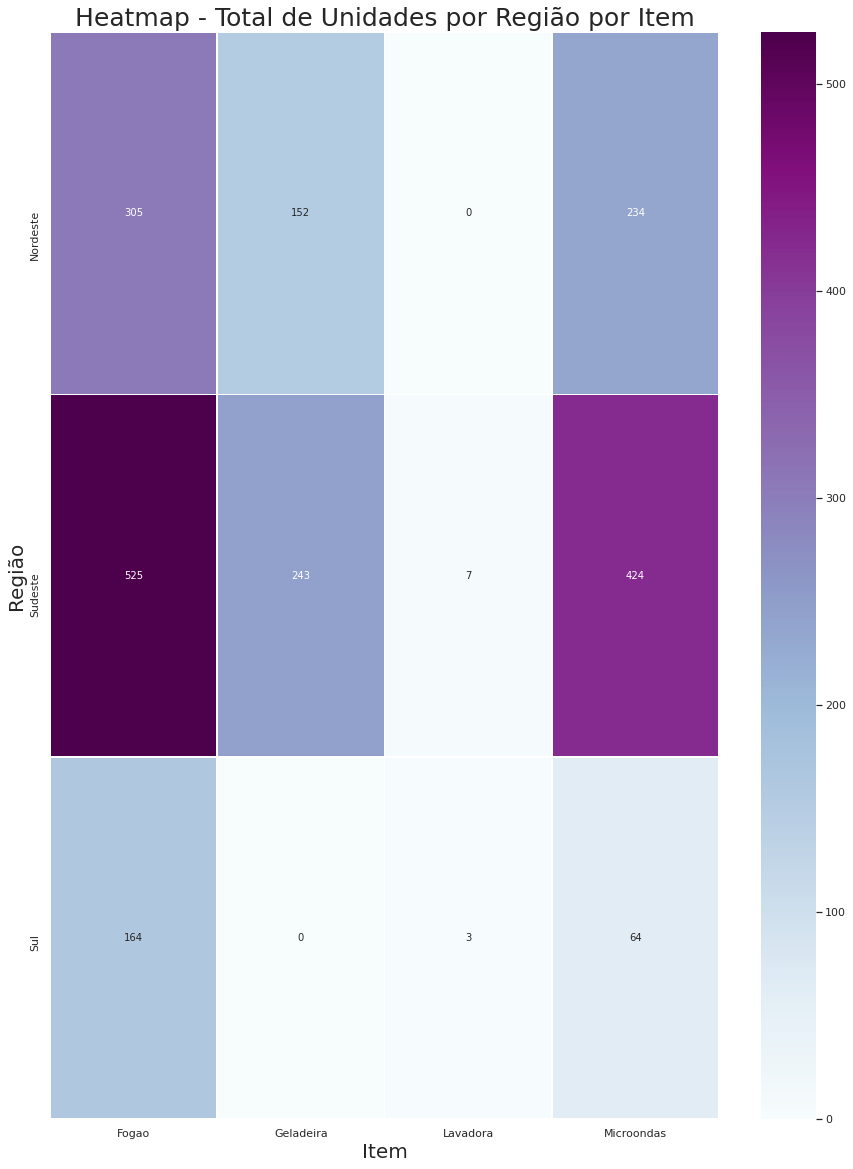

In [259]:
gm1 = regiao_item_total_unidade.pivot("Regiao", "Item", "Unidades")
fig, ax = plt.subplots(figsize=(15,20)) 
sns.heatmap(gm1, linewidths=1, cmap="BuPu", annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Total de Unidades por Região por Item", fontdict={'size':25})
ax.xaxis.set_label_text("Item", fontdict= {'size':20}) 
ax.yaxis.set_label_text("Região", fontdict= {'size':20}) 
plt.show()

## Cálculo Médio de Unidaes por Região e por Item

In [258]:
regiao_item_medio_unidade = pd.DataFrame() 

for r in list(analise["Regiao"].unique()): 
    
    for i in list(analise["Item"].unique()): 
        
        u = analise[(analise["Regiao"] == r) & (analise["Item"] == i)]["Unidades"].mean() 
        regiao_item_medio_unidade = regiao_item_medio_unidade.append(pd.DataFrame({'Regiao':r, 'Item':i, 'Unidades':u}, index=[0]))
        
regiao_item_medio_unidade = regiao_item_medio_unidade.reset_index() 
del regiao_item_medio_unidade["index"] 

regiao_item_medio_unidade["Unidades"].fillna(0, inplace=True) 
regiao_item_medio_unidade["Unidades"].isnull().value_counts()
regiao_item_medio_unidade["Unidades"] = regiao_item_medio_unidade["Unidades"].astype(int)

regiao_item_medio_unidade.head(5)

,Regiao,Item,Unidades
0,Nordeste,Geladeira,50
1,Nordeste,Microondas,46
2,Nordeste,Fogao,61
3,Nordeste,Lavadora,0
4,Sudeste,Geladeira,60


## Gráfico de Unidade Médio de Região por Item

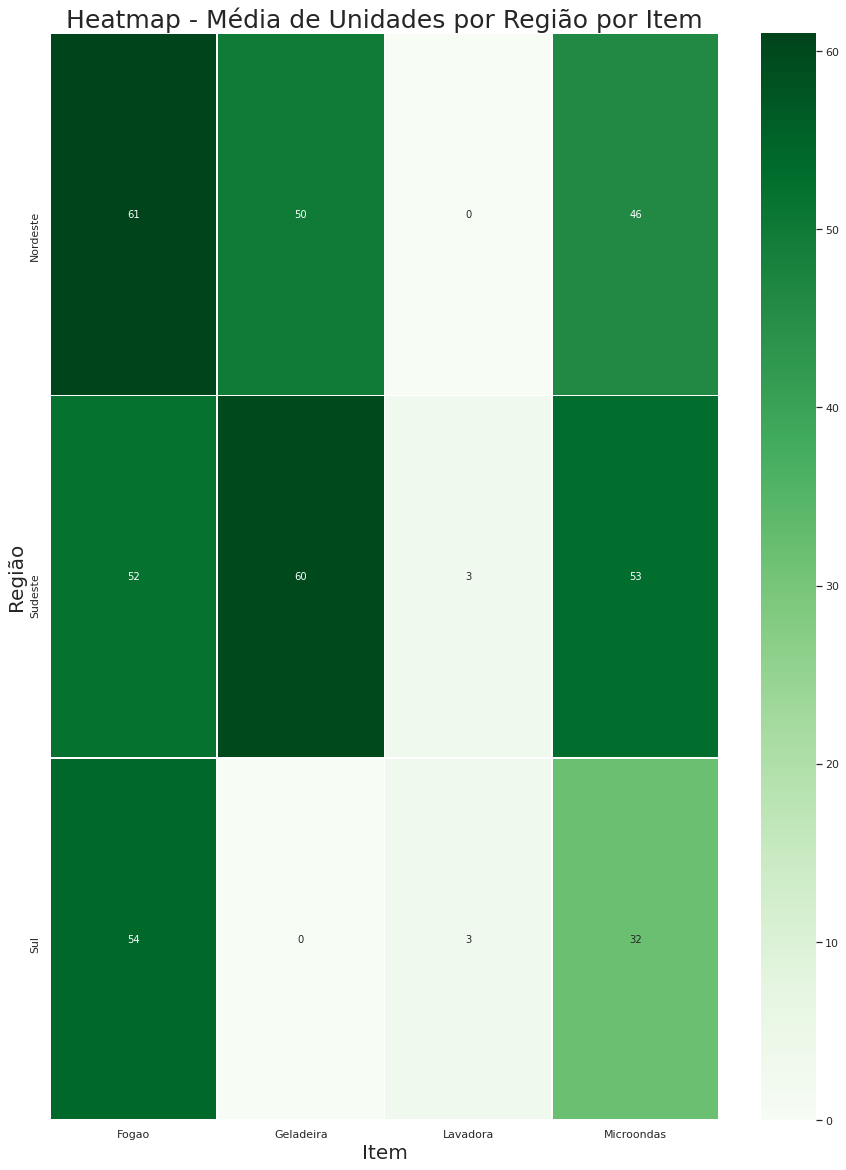

In [261]:
gm2 = regiao_item_medio_unidade.pivot("Regiao", "Item", "Unidades")
fig, ax = plt.subplots(figsize=(15,20)) 
sns.heatmap(gm2, linewidths=1, cmap="Greens", annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Média de Unidades por Região por Item", fontdict={'size':25})
ax.xaxis.set_label_text("Item", fontdict= {'size':20}) 
ax.yaxis.set_label_text("Região", fontdict= {'size':20}) 
plt.show()

## Cálculo Total de Unidades por Estado e Item

In [262]:
estado_item_total_unidade = pd.DataFrame() 

for e in list(analise["Estado"].unique()): 
    
    for i in list(analise["Item"].unique()): 
        
        u = analise[(analise["Estado"] == e) & (analise["Item"] == i)]["Unidades"].sum() 
        estado_item_total_unidade = estado_item_total_unidade.append(pd.DataFrame({'Estado':e, 'Item':i, 'Unidades':u}, index=[0]))
        
estado_item_total_unidade = estado_item_total_unidade.reset_index() 
del estado_item_total_unidade["index"] 

estado_item_total_unidade["Unidades"].fillna(0, inplace=True) 
estado_item_total_unidade["Unidades"].isnull().value_counts()
estado_item_total_unidade["Unidades"] = estado_item_total_unidade["Unidades"].astype(int)

estado_item_total_unidade.head(5)

,Estado,Item,Unidades
0,Pernambuco,Geladeira,152
1,Pernambuco,Microondas,0
2,Pernambuco,Fogao,0
3,Pernambuco,Lavadora,0
4,Paraíba,Geladeira,0


## Gráfico de Unidade Total por Estado e Item

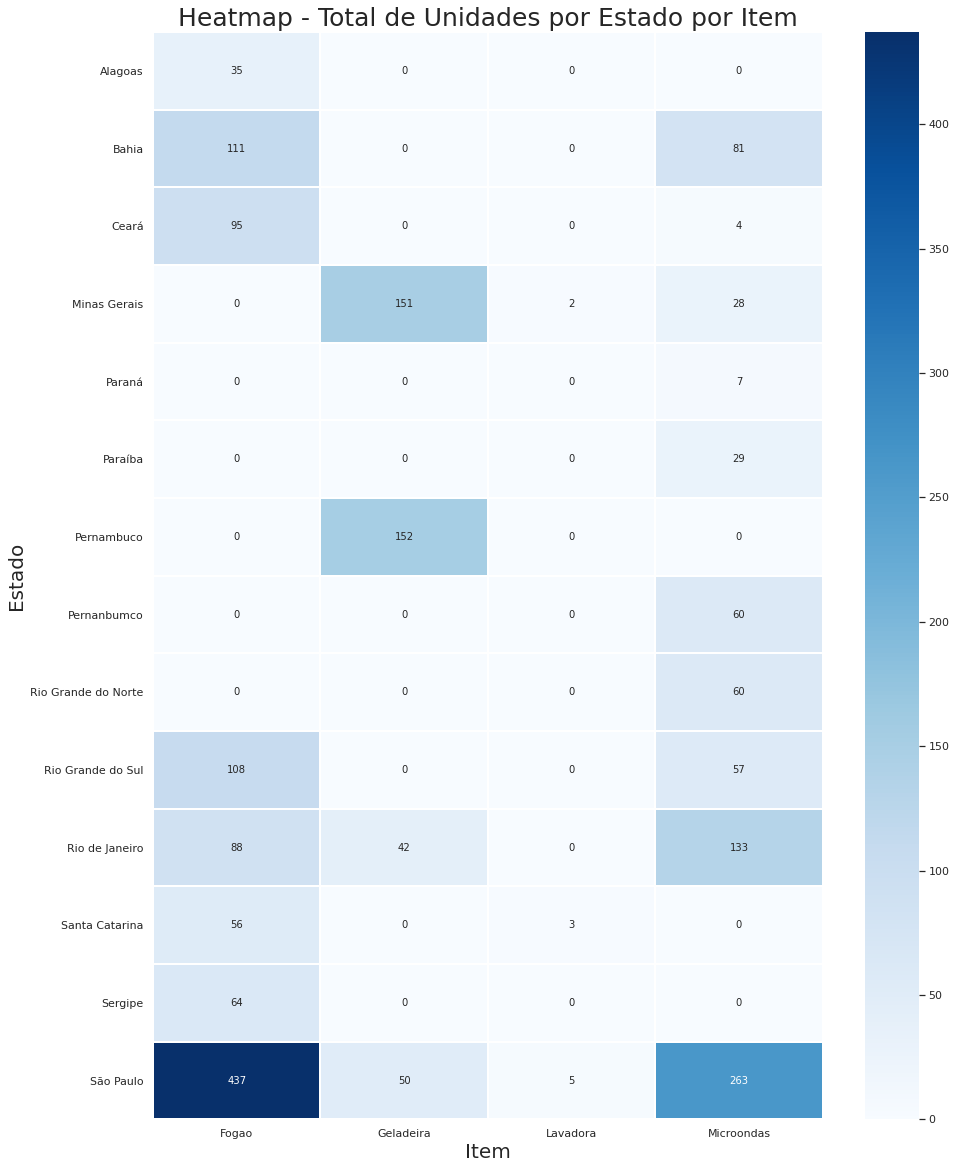

In [264]:
gm3 = estado_item_total_unidade.pivot("Estado", "Item", "Unidades")
fig, ax = plt.subplots(figsize=(15,20)) 
sns.heatmap(gm3, linewidths=1, cmap="Blues", annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Total de Unidades por Estado por Item", fontdict={'size':25})
ax.xaxis.set_label_text("Item", fontdict= {'size':20}) 
ax.yaxis.set_label_text("Estado", fontdict= {'size':20}) 
plt.show()

## Calculo de Unidade Média por Estado e Item

In [265]:
estado_item_medio_unidade = pd.DataFrame() 

for e in list(analise["Estado"].unique()): 
    
    for i in list(analise["Item"].unique()): 
        
        u = analise[(analise["Estado"] == e) & (analise["Item"] == i)]["Unidades"].mean() 
        estado_item_medio_unidade = estado_item_medio_unidade.append(pd.DataFrame({'Estado':e, 'Item':i, 'Unidades':u}, index=[0]))
        
estado_item_medio_unidade = estado_item_medio_unidade.reset_index() 
del estado_item_medio_unidade["index"] 

estado_item_medio_unidade["Unidades"].fillna(0, inplace=True) 
estado_item_medio_unidade["Unidades"].isnull().value_counts()
estado_item_medio_unidade["Unidades"] = estado_item_medio_unidade["Unidades"].astype(int)

estado_item_medio_unidade.head(5)

,Estado,Item,Unidades
0,Pernambuco,Geladeira,50
1,Pernambuco,Microondas,0
2,Pernambuco,Fogao,0
3,Pernambuco,Lavadora,0
4,Paraíba,Geladeira,0


## Gráfico de Unidades por Estado e Item

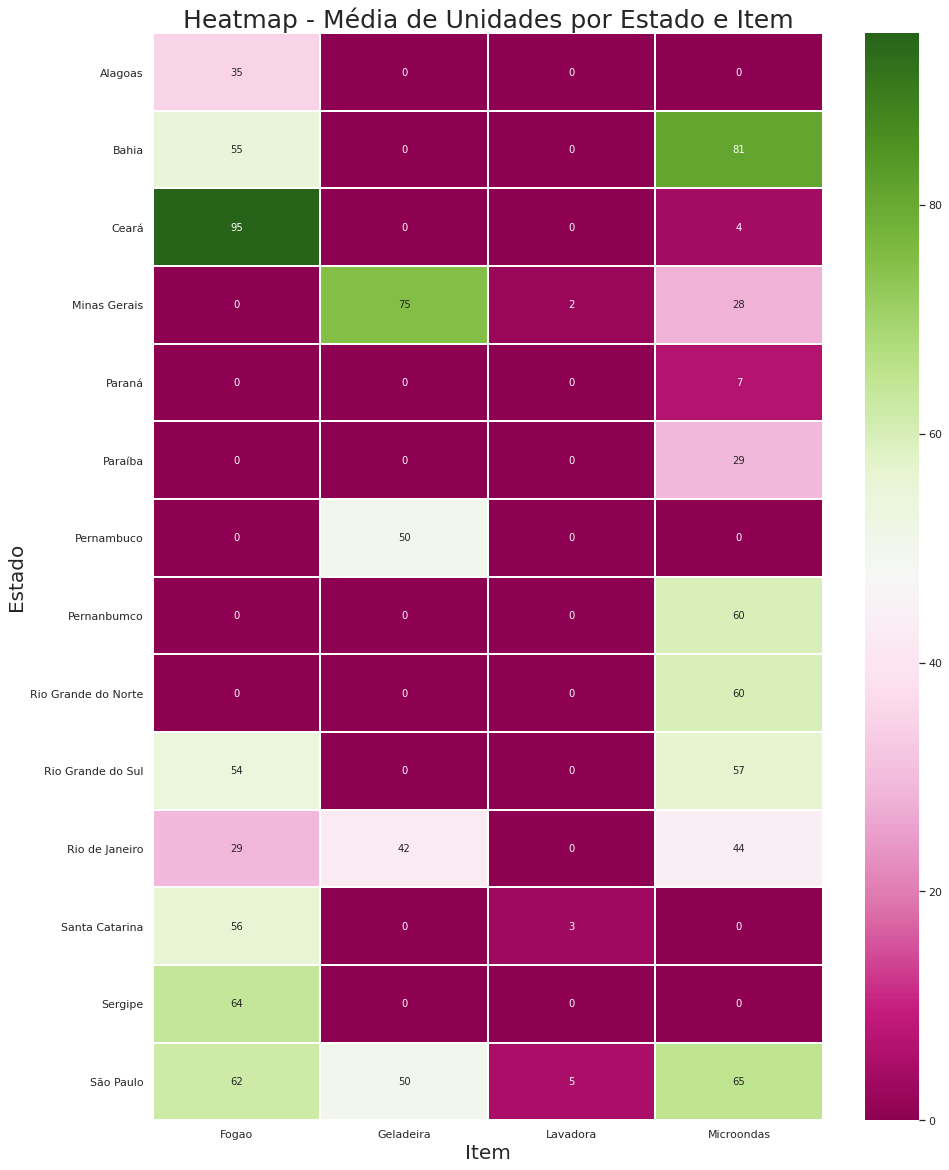

In [267]:
gm4 = estado_item_medio_unidade.pivot("Estado", "Item", "Unidades")
fig, ax = plt.subplots(figsize=(15,20)) 
sns.heatmap(gm4, linewidths=1, cmap="PiYG", annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Média de Unidades por Estado e Item", fontdict={'size':25})
ax.xaxis.set_label_text("Item", fontdict= {'size':20}) 
ax.yaxis.set_label_text("Estado", fontdict= {'size':20}) 
plt.show()

## Cálculo total de Unidades por Vendedores e Itens 

In [268]:
vendedor_item_total_unidade = pd.DataFrame() 

for v in list(analise["Vendedor"].unique()): 
    
    for i in list(analise["Item"].unique()): 
        
        u = analise[(analise["Vendedor"] == v) & (analise["Item"] == i)]["Unidades"].sum() 
        vendedor_item_total_unidade = vendedor_item_total_unidade.append(pd.DataFrame({'Vendedor':v, 'Item':i, 'Unidades':u}, index=[0]))
        
vendedor_item_total_unidade = vendedor_item_total_unidade.reset_index() 
del vendedor_item_total_unidade["index"] 

vendedor_item_total_unidade["Unidades"].fillna(0, inplace=True) 
vendedor_item_total_unidade["Unidades"].isnull().value_counts()
vendedor_item_total_unidade["Unidades"] = vendedor_item_total_unidade["Unidades"].astype(int)

vendedor_item_total_unidade.head(5)

,Vendedor,Item,Unidades
0,Tobias,Geladeira,78
1,Tobias,Microondas,124
2,Tobias,Fogao,194
3,Tobias,Lavadora,0
4,Nadia,Geladeira,0


## Gráfico total de Unidades por Vendedor e Item 

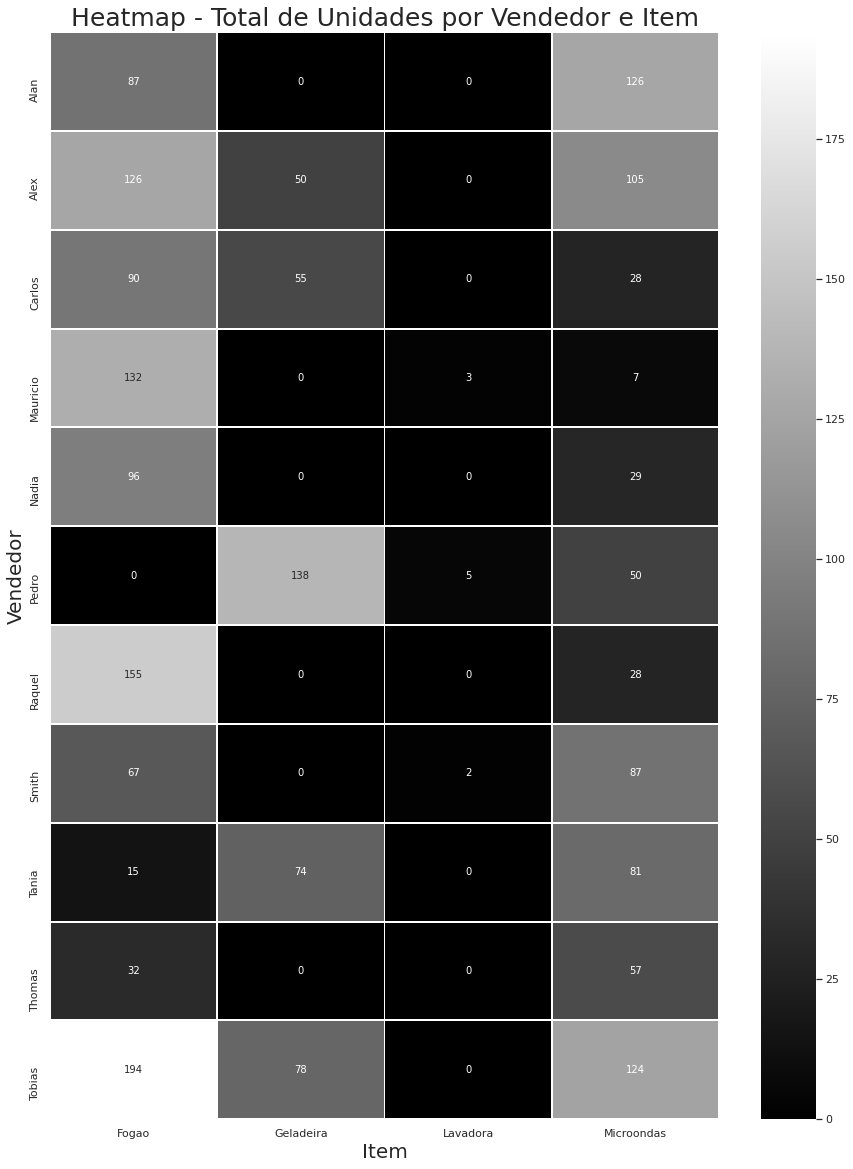

In [270]:
gm5 = vendedor_item_total_unidade.pivot("Vendedor", "Item", "Unidades")
fig, ax = plt.subplots(figsize=(15,20)) 
sns.heatmap(gm5, linewidths=1, cmap="gray", annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Total de Unidades por Vendedor e Item", fontdict={'size':25})
ax.xaxis.set_label_text("Item", fontdict= {'size':20}) 
ax.yaxis.set_label_text("Vendedor", fontdict= {'size':20}) 
plt.show() 

## Calculo Médio de Unidades por Vendedores e Itens

In [274]:
vendedor_item_medio_unidade = pd.DataFrame() 

for v in list(analise["Vendedor"].unique()): 
    
    for i in list(analise["Item"].unique()): 
        
        u = analise[(analise["Vendedor"] == v) & (analise["Item"] == i)]["Unidades"].mean() 
        vendedor_item_medio_unidade = vendedor_item_medio_unidade.append(pd.DataFrame({'Vendedor':v, 'Item':i, 'Unidades':u}, index=[0]))
        
vendedor_item_medio_unidade = vendedor_item_medio_unidade.reset_index() 
del vendedor_item_medio_unidade["index"] 

vendedor_item_medio_unidade["Unidades"].fillna(0, inplace=True) 
vendedor_item_medio_unidade["Unidades"].isnull().value_counts()
vendedor_item_medio_unidade["Unidades"] = vendedor_item_medio_unidade["Unidades"].astype(int)

vendedor_item_medio_unidade.head(5)

,Vendedor,Item,Unidades
0,Tobias,Geladeira,39
1,Tobias,Microondas,41
2,Tobias,Fogao,64
3,Tobias,Lavadora,0
4,Nadia,Geladeira,0


## Gráficos de Unidade Média por Vendedores e Itens 

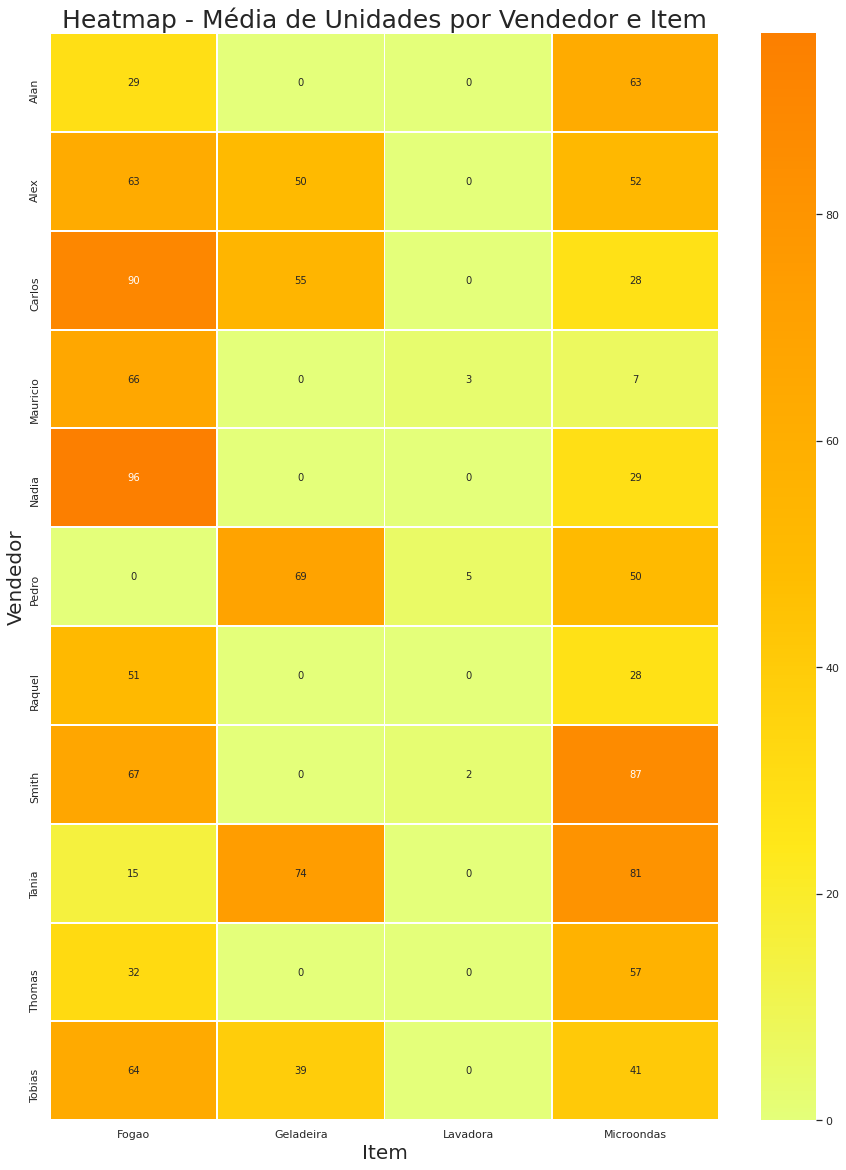

In [276]:
gm6 = vendedor_item_total_unidade.pivot("Vendedor", "Item", "Unidades")
fig, ax = plt.subplots(figsize=(15,20)) 
sns.heatmap(gm6, linewidths=1, cmap="Wistia", annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Média de Unidades por Vendedor e Item", fontdict={'size':25})
ax.xaxis.set_label_text("Item", fontdict= {'size':20}) 
ax.yaxis.set_label_text("Vendedor", fontdict= {'size':20}) 
plt.show() 

## Análise geral de Preço Unidade de Região por Item 

In [281]:
regiao_item_preco_total = analise.groupby(["Regiao", "Item"]).sum()["PrecoUnidade"].rename("Preço Total") 
regiao_item_preco_media = analise.groupby(["Regiao", "Item"]).mean()["PrecoUnidade"].rename("Média de Preço") 

analise_geral = pd.DataFrame({"Preço Total" : regiao_item_preco_total, 
                              "Média de Preço" : regiao_item_preco_media}) 

analise_geral["Preço Total"] = analise_geral["Preço Total"].map("R$ {:,.2f}".format) 
analise_geral["Média de Preço"] = analise_geral["Média de Preço"].map("R$ {:,.2f}".format)

analise_geral

Preço Total Média de Preço
Regiao   Item                                   
Nordeste Fogao        R$ 4,854.95      R$ 970.99
         Geladeira    R$ 3,402.97    R$ 1,134.32
         Microondas   R$ 6,624.95    R$ 1,324.99
Sudeste  Fogao       R$ 13,508.10    R$ 1,350.81
         Geladeira    R$ 6,386.42    R$ 1,596.60
         Lavadora     R$ 2,500.00    R$ 1,250.00
         Microondas  R$ 11,596.93    R$ 1,449.62
Sul      Fogao        R$ 5,492.97    R$ 1,830.99
         Lavadora     R$ 2,750.00    R$ 2,750.00
         Microondas   R$ 3,801.98    R$ 1,900.99

## Análise geral de Preço Unidade de Estado por Item

In [287]:
estado_item_total = analise.groupby(["Estado", "Item"]).sum()["PrecoUnidade"].rename("Preço Total") 
estado_item_media = analise.groupby(["Estado", "Item"]).mean()["PrecoUnidade"].rename("Média de Preço") 

analise_geral = pd.DataFrame({"Preço Total" : estado_item_total, 
                              "Média de Preço" : estado_item_media}) 

analise_geral["Preço Total"] = analise_geral["Preço Total"].map("R$ {:,.2f}".format) 
analise_geral["Média de Preço"] = analise_geral["Média de Preço"].map("R$ {:,.2f}".format)
analise_geral

Preço Total Média de Preço
Estado              Item                                  
Alagoas             Fogao         R$ 400.99      R$ 400.99
Bahia               Fogao       R$ 2,301.98    R$ 1,150.99
                    Microondas  R$ 1,900.99    R$ 1,900.99
Ceará               Fogao       R$ 1,350.99    R$ 1,350.99
                    Microondas  R$ 1,420.99    R$ 1,420.99
Minas Gerais        Geladeira   R$ 2,651.48    R$ 1,325.74
                    Lavadora    R$ 1,250.00    R$ 1,250.00
                    Microondas    R$ 890.99      R$ 890.99
Paraná              Microondas  R$ 1,900.99    R$ 1,900.99
Paraíba             Microondas    R$ 100.99      R$ 100.99
Pernambuco          Geladeira   R$ 3,402.97    R$ 1,134.32
Pernanbumco         Microondas  R$ 2,400.99    R$ 2,400.99
Rio Grande do Norte Microondas    R$ 800.99      R$ 800.99
Rio Grande do Sul   Fogao       R$ 3,151.98    R$ 1,575.99
                    Microondas  R$ 1,900.99    R$ 1,900.99
Rio de Janeiro      Fogao       R$ 4,240.87    R$ 1,413.62
                    Geladeira   R$ 2,300.95    R$ 2,300.95
                    Microondas  R$ 5,702.97    R$ 1,900.99
Santa Catarina      Fogao       R$ 2,340.99    R$ 2,340.99
                    Lavadora    R$ 2,750.00    R$ 2,750.00
Sergipe             Fogao         R$ 800.99      R$ 800.99
São Paulo           Fogao       R$ 9,267.23    R$ 1,323.89
                    Geladeira   R$ 1,433.99    R$ 1,433.99
                    Lavadora    R$ 1,250.00    R$ 1,250.00
                    Microondas  R$ 5,002.97    R$ 1,250.74

## Análise geral de Preço de  Unidade total e média por Vendedor Estado, Regiao e Item

In [497]:
vendedor_analise_total = analise.groupby(["DataPedido","Vendedor", "Estado", "Regiao", "Item"]).sum()["PrecoUnidade"].rename("Preço Total") 
vendedor_analise_media = analise.groupby(["DataPedido","Vendedor", "Estado", "Regiao", "Item"]).mean()["PrecoUnidade"].rename("Média de Preço") 

analise_geral2 = pd.DataFrame({"Preço Total" : vendedor_analise_total, 
                              "Média de Preço" : vendedor_analise_media}) 

analise_geral2["Preço Total"] = analise_geral2["Preço Total"].map("R$ {:,.2f}".format)
analise_geral2["Média de Preço"] = analise_geral2["Média de Preço"].map("R$ {:,.2f}".format) 

analise_geral2

Preço Total  \
DataPedido  Vendedor Estado              Regiao   Item                      
1-Apr-2021  Tobias   Pernanbumco         Nordeste Microondas  R$ 2,400.99   
1-Feb-2021  Smith    São Paulo           Sudeste  Microondas  R$ 1,500.00   
10-Apr-2021 Raquel   São Paulo           Sudeste  Fogao       R$ 1,900.99   
10-Jun-2021 Pedro    São Paulo           Sudeste  Lavadora    R$ 1,250.00   
10-Sep-2020 Alan     Rio de Janeiro      Sudeste  Fogao       R$ 1,000.29   
            Smith    Minas Gerais        Sudeste  Lavadora    R$ 1,250.00   
11-Jul-2020 Nadia    Paraíba             Nordeste Microondas    R$ 100.99   
11-Jun-2021 Carlos   São Paulo           Sudeste  Fogao         R$ 400.99   
12-Dec-2020 Smith    Rio de Janeiro      Sudeste  Fogao       R$ 1,900.29   
12-Sep-2020 Tobias   Pernambuco          Nordeste Geladeira   R$ 1,500.99   
14-Dec-2020 Alex     Rio de Janeiro      Sudeste  Microondas  R$ 1,900.99   
14-May-2021 Alan     São Paulo           Sudeste  Fogao       R$ 1,340.29   
14-Oct-2020 Thomas   Rio Grande do Sul   Sul      Microondas  R$ 1,900.99   
15-Mar-2021 Mauricio Santa Catarina      Sul      Fogao       R$ 2,340.99   
15-Oct-2020 Carlos   Minas Gerais        Sudeste  Microondas    R$ 890.99   
16-Aug-2020 Pedro    Rio de Janeiro      Sudeste  Geladeira   R$ 2,300.95   
16-Jan-2021 Tobias   Ceará               Nordeste Fogao       R$ 1,350.99   
17-Nov-2020 Alex     Rio de Janeiro      Sudeste  Microondas  R$ 1,400.99   
18-Apr-2021 Raquel   São Paulo           Sudeste  Fogao       R$ 1,800.99   
18-Feb-2021 Tobias   Ceará               Nordeste Microondas  R$ 1,420.99   
18-Nov-2020 Tania    Bahia               Nordeste Fogao       R$ 1,900.99   
19-Jul-2020 Tania    Bahia               Nordeste Microondas  R$ 1,900.99   
20-Jul-2020 Carlos   Minas Gerais        Sudeste  Geladeira   R$ 1,200.49   
21-Dec-2020 Raquel   Rio de Janeiro      Sudeste  Microondas  R$ 2,400.99   
22-Aug-2020 Tobias   Alagoas             Nordeste Fogao         R$ 400.99   
22-May-2021 Thomas   Rio Grande do Sul   Sul      Fogao       R$ 1,700.99   
22-Nov-2020 Pedro    Minas Gerais        Sudeste  Geladeira   R$ 1,450.99   
22-Oct-2020 Tobias   Sergipe             Nordeste Fogao         R$ 800.99   
23-Jan-2021 Pedro    São Paulo           Sudeste  Microondas  R$ 1,900.99   
24-Aug-2020 Mauricio Santa Catarina      Sul      Lavadora    R$ 2,750.00   
24-Mar-2021 Alex     São Paulo           Sudeste  Geladeira   R$ 1,433.99   
26-Feb-2021 Alan     São Paulo           Sudeste  Fogao       R$ 1,999.99   
26-Sep-2020 Mauricio Rio Grande do Sul   Sul      Fogao       R$ 1,450.99   
27-Apr-2021 Nadia    Bahia               Nordeste Fogao         R$ 400.99   
29-Dec-2020 Tania    Pernambuco          Nordeste Geladeira   R$ 1,500.99   
31-May-2021 Alan     São Paulo           Sudeste  Microondas    R$ 800.99   
31-Oct-2020 Raquel   Rio de Janeiro      Sudeste  Fogao       R$ 1,340.29   
5-Jan-2021  Alan     São Paulo           Sudeste  Microondas    R$ 800.99   
5-May-2021  Alex     São Paulo           Sudeste  Fogao       R$ 1,422.99   
7-Jun-2020  Tobias   Pernambuco          Nordeste Geladeira     R$ 400.99   
7-Mar-2021  Mauricio Paraná              Sul      Microondas  R$ 1,900.99   
8-Jun-2021  Tobias   Rio Grande do Norte Nordeste Microondas    R$ 800.99   
9-Feb-2021  Alex     São Paulo           Sudeste  Fogao         R$ 400.99   

                                                             Média de Preço  
DataPedido  Vendedor Estado              Regiao   Item                       
1-Apr-2021  Tobias   Pernanbumco         Nordeste Microondas    R$ 2,400.99  
1-Feb-2021  Smith    São Paulo           Sudeste  Microondas    R$ 1,500.00  
10-Apr-2021 Raquel   São Paulo           Sudeste  Fogao         R$ 1,900.99  
10-Jun-2021 Pedro    São Paulo           Sudeste  Lavadora      R$ 1,250.00  
10-Sep-2020 Alan     Rio de Janeiro      Sudeste  Fogao         R$ 1,000.29  
            Smith    Minas Gerais        Sudeste  